In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
churn = pd.read_csv('churn.csv')

In [3]:
churn.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [4]:
churn.isna

<bound method DataFrame.isna of      State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0       KS             128        415  382-4657         no        yes   
1       OH             107        415  371-7191         no        yes   
2       NJ             137        415  358-1921         no         no   
3       OH              84        408  375-9999        yes         no   
4       OK              75        415  330-6626        yes         no   
5       AL             118        510  391-8027        yes         no   
6       MA             121        510  355-9993         no        yes   
7       MO             147        415  329-9001        yes         no   
8       LA             117        408  335-4719         no         no   
9       WV             141        415  330-8173        yes        yes   
10      IN              65        415  329-6603         no         no   
11      RI              74        415  344-9403         no         no   
12      IA         

In [5]:
churn.head(50)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [6]:
churn.iloc[:,4].replace(['yes','no'],[1,0],inplace=True)

In [39]:
#remove columns that are not useful 
#replace True/False Yes/No to 1,0.
churn.pop('Day Mins')
churn.pop('Eve Mins')
churn.pop('Night Mins')
churn.pop('Intl Mins')
churn.pop('VMail Plan')
churn.pop('State')
churn.pop('Phone')
churn.iloc[:,4].replace(['yes','no'],[1,0],inplace=True)

churn.iloc[:,15].replace(['True.','False.'],[1,0],inplace=True)
churn.head(10)

,Account Length,Area Code,Int'l Plan,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,107,415,0,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,137,415,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,84,408,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,75,415,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
5,118,510,1,0,98,37.98,101,18.75,118,9.18,6,1.70,0,0
6,121,510,0,24,88,37.09,108,29.62,118,9.57,7,2.03,3,0
7,147,415,1,0,79,26.69,94,8.76,96,9.53,6,1.92,0,0
8,117,408,0,0,97,31.37,80,29.89,90,9.71,4,2.35,1,0
9,141,415,1,37,84,43.96,111,18.87,97,14.69,5,3.02,0,0


In [27]:
corr = churn.corr()

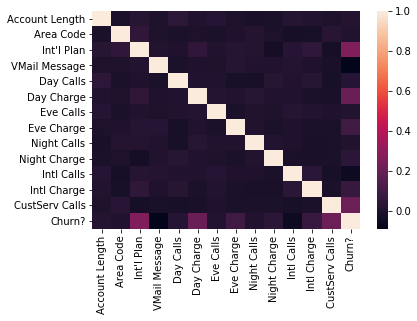

In [28]:
sns.heatmap(corr,annot_kws={'size':200})

In [40]:
#model selection
from sklearn.model_selection import train_test_split
train,test = train_test_split(churn,test_size=0.25)

In [41]:
train_y = train['Churn?']
test_y = test['Churn?']

In [42]:
train_x = train
train_x.pop('Churn?')
test_x = test
test_x.pop('Churn?')

2791    0
1332    0
2900    1
1700    0
3209    1
566     0
2598    0
529     0
2671    0
2583    0
3251    0
1998    0
2444    0
1399    0
1257    0
3114    0
60      0
716     0
1199    0
2979    1
3309    0
1020    0
1326    0
1436    0
1527    0
2190    0
1982    0
2919    0
1913    0
969     0
       ..
1152    0
2910    0
2868    1
1707    1
1965    1
2794    1
1136    1
3174    0
2763    0
3151    1
499     0
1800    0
1848    0
827     0
2586    0
1051    0
576     0
3238    1
2580    0
2663    0
1715    0
2523    0
2218    1
2575    1
1270    0
323     0
412     0
2289    0
644     0
2042    0
Name: Churn?, Length: 834, dtype: int64

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [66]:
logisticRegr = LogisticRegression()

In [45]:
logisticRegr.fit(X=train_x, y=train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
test_y_pred = logisticRegr.predict(test_x)

In [49]:
test_y_pred.shape

(834,)

In [67]:
confusion_matrix = confusion_matrix(test_y, test_y_pred)

In [51]:
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))
 

Intercept: [-3.3847997]
Regression: [[ 7.56137157e-04 -4.41957235e-03  2.00391149e+00 -2.39767694e-02
  -8.85276672e-04  6.94637557e-02 -1.94656405e-03  5.38868915e-02
  -6.91933169e-03  1.80231770e-02 -8.93468432e-02  1.75711842e-01
   4.83717840e-01]]
Accuracy of logistic regression classifier on test set: 0.87
             precision    recall  f1-score   support

          0       0.89      0.97      0.93       721
          1       0.51      0.21      0.30       113

avg / total       0.84      0.87      0.84       834



Text(0.5,15,'Predicted label')

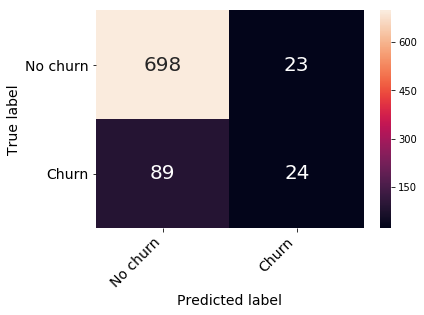

In [56]:
confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)


In [57]:
churn['Churn?'].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

In [59]:
#random forest

from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(train_x, train_y)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(test_x, test_y)))
test2 = randomForest.predict(test_x)

Accuracy of random forest classifier on test set: 0.93


Text(0.5,15,'Predicted label')

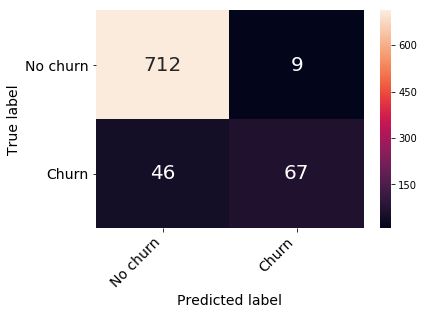

In [70]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(test_y, test2)
confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)


In [63]:
test_y

2791    0
1332    0
2900    1
1700    0
3209    1
566     0
2598    0
529     0
2671    0
2583    0
3251    0
1998    0
2444    0
1399    0
1257    0
3114    0
60      0
716     0
1199    0
2979    1
3309    0
1020    0
1326    0
1436    0
1527    0
2190    0
1982    0
2919    0
1913    0
969     0
       ..
1152    0
2910    0
2868    1
1707    1
1965    1
2794    1
1136    1
3174    0
2763    0
3151    1
499     0
1800    0
1848    0
827     0
2586    0
1051    0
576     0
3238    1
2580    0
2663    0
1715    0
2523    0
2218    1
2575    1
1270    0
323     0
412     0
2289    0
644     0
2042    0
Name: Churn?, Length: 834, dtype: int64